In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
path = "Age_blah/annotations/tsv/"
files = os.listdir(path)
base="DevicePMAs@therightstef-"

In [3]:
from urllib.request import urlopen
uurl = 'http://pubannotation.org/docs/sourcedb/DevicePMAs@therightstef/sourceid/'

def preprocess(line):
    line = line[2:len(line)-3]
    return line

def readLines(file_name):
    sentences = list()
    with open(file_name, "r") as fp:
        #f.readline()
        for idx, line in enumerate(fp):
            #print(line)
            line= preprocess(line)
            sentences.append(line)
        return sentences


In [4]:
#determine which files have annotations
annot=[]
for file in os.listdir("Age_blah/annotations/tsv"):
    annotation=pd.read_csv(path + file, sep = "\t")
    if len(annotation)!=0:
        annot.append(file)

In [5]:
3322-len(annot)

3018

In [6]:
def genDataframe():
    dfAge=pd.read_csv(path + annot[0], sep = "\t")
    length = len(dfAge)
    txt = readLines("Age_blah/texts/" + annot[0].split(".")[0] + ".txt")[0]
    dfAge.insert(0, 'Text', [txt]*length)
    ID = annot[0].split("-")[1].split(".")[0]
    dfAge.insert(0, "ID", [ID]*length)

    for i in range(1, len(annot)):
        annotate = pd.read_csv(path + annot[i], sep = "\t")
        length = len(annotate)
        txt = readLines("Age_blah/texts/" + annot[i].split(".")[0] + ".txt")[0]
        annotate.insert(0, 'Text', [txt]*length)
        ID = annot[i].split("-")[1].split(".")[0]
        annotate.insert(0, 'ID', [ID]*length)

        frames = [dfAge, annotate]
        dfAge = pd.concat(frames)

    dfAge = dfAge.reset_index(drop=True)
    return dfAge
dfAge = genDataframe()

In [7]:
uniqueID = dfAge.drop_duplicates("Text")["ID"]
len(uniqueID)
#unique devices
#3322-394 = 2928
#284 unique documents

284

In [8]:
dfAge=dfAge[dfAge.ID.isin(uniqueID)].reset_index(drop=True)

#get rid of duplicate text

In [31]:
dfAge[dfAge.Object=="age_category"]["Lexical cue"].unique()

array(['adults', 'infants', 'children', 'adult', 'adolescents',
       'pediatric', 'Children', 'Infants', 'child', 'infant', 'Adults'],
      dtype=object)

In [9]:
dfAge["Object"].value_counts()

age_end           349
age_start         346
age_range         333
age_start_unit    235
age_category      182
age_end_unit       58
Name: Object, dtype: int64

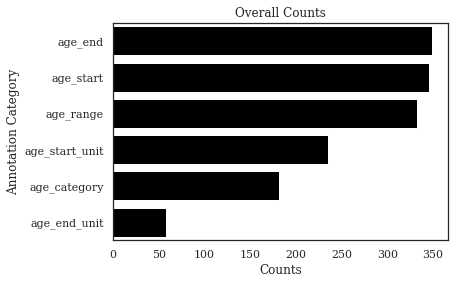

In [9]:
def set_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper")
    
    # Set the font to be serif, rather than sans
    sns.set(font='serif')
    
    # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })


set_style()

#set_labels(fig, axes)

ax=sns.barplot(y=dfAge["Object"].value_counts().index[0:10], x=dfAge["Object"].value_counts().values[0:10], color ="black")
ax.set(xlabel="Counts", ylabel="Annotation Category", title="Overall Counts")
plt.savefig('Figures/Annotation_Category_Counts.svg', format = 'svg', dpi = 1200)


In [10]:
def countPlot(df, var, xlabel, ylabel, title):
    #display top 10 counts for variable
    #counts are x axis and y axis is variable
    if var is None:
        ax=sns.barplot(y=df.value_counts().index[0:10], x=df.value_counts().values[0:10])
        ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    else:
        ax=sns.barplot(y=df[var].value_counts().index[0:10], x=df[var].value_counts().values[0:10])
        ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

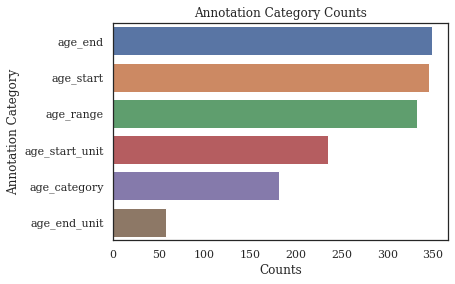

In [11]:
countPlot(dfAge, "Object", "Counts", "Annotation Category", "Annotation Category Counts")

In [12]:
dfAge["Object"].value_counts()

age_end           349
age_start         346
age_range         333
age_start_unit    235
age_category      182
age_end_unit       58
Name: Object, dtype: int64

In [13]:
dfAge["Lexical cue"]=dfAge["Lexical cue"].replace({"adult": "adults", "Adults":"adults", "inadults": "adults"})
dfAge["Lexical cue"]=dfAge["Lexical cue"].replace({"illinfants": "infants", "infant":"infants", "Infants": "infants"})
dfAge["Lexical cue"]=dfAge["Lexical cue"].replace({"child": "children", "Children":"children"})
cat = dfAge[dfAge["Object"]=="age_category"]["Lexical cue"]


In [14]:
#sanity check
cat.unique()

array(['adults', 'infants', 'children', 'adolescents', 'pediatric'],
      dtype=object)

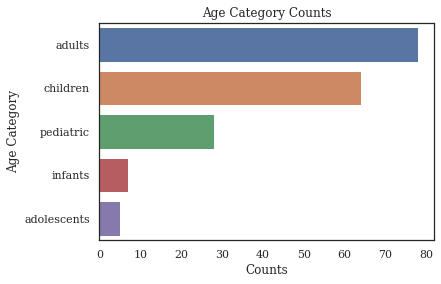

In [15]:
countPlot(cat, None, "Counts", "Age Category", "Age Category Counts")

In [16]:
#change age start

dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="eighteen"),'Lexical cue']="18"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="twelve"),'Lexical cue']="12"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="fifty"),'Lexical cue']="50"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="four"),'Lexical cue']="4"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="fourteen"),'Lexical cue']="14"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="sixteen"),'Lexical cue']="16"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="sixty"),'Lexical cue']="60"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="seven"),'Lexical cue']="7"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="two"),'Lexical cue']="2"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="\t18"),'Lexical cue']="18"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="two"),'Lexical cue']="2"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="under"),'Lexical cue']="0"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="<="),'Lexical cue']="0"
dfAge.loc[(dfAge["Object"]== 'age_start') & (dfAge["Lexical cue"]=="less than"),'Lexical cue']="0"

#check to see if they are all numbers
dfAge[(dfAge["Object"]=="age_start")]["Lexical cue"].unique()

array(['16', '21', '0', '18', '50', '22', '2', '60', '45', '4', '7', '12',
       '40', '75', '36', '8', '1', '24', '6', 'up to', '14', '65', '41',
       '13', '30', '25'], dtype=object)

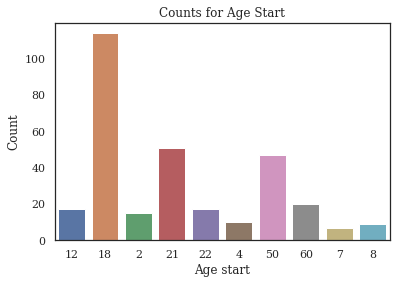

In [17]:
cat = dfAge[dfAge["Object"]=="age_start"]["Lexical cue"]
ax=sns.barplot(x=cat.value_counts().index[0:10], y=cat.value_counts().values[0:10])
ax.set(xlabel="Age start", ylabel="Count", title="Counts for Age Start")
print('')

In [18]:
#change age end
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="over"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="greater"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="greater than"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="at least"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]==">="),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="greater than or equal"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="adulthood"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="more"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="seventeen"),'Lexical cue']="17"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="eleven"),'Lexical cue']="11"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="above"),'Lexical cue']="older"
dfAge.loc[(dfAge["Object"]== 'age_end') & (dfAge["Lexical cue"]=="up"),'Lexical cue']="older"
#check
dfAge[dfAge["Object"]=="age_end"]["Lexical cue"].unique()

array(['older', '8', '17', '20', '21', '11', 'less than', '36', '41',
       '38', '60', '75', '18', '65', '74', '2', '45', '12'], dtype=object)

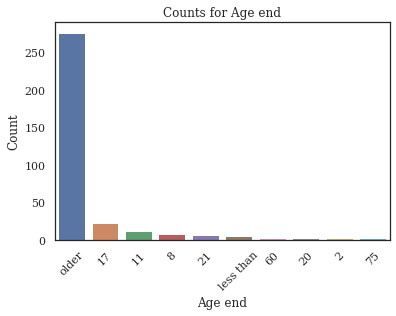

In [19]:
cat = dfAge[dfAge["Object"]=="age_end"]["Lexical cue"]
ax=sns.barplot(x=cat.value_counts().index[0:10], y=cat.value_counts().values[0:10])
ax.set(xlabel="Age end", ylabel="Count", title="Counts for Age end")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
print('')

In [20]:
#change age start units
dfAge.loc[(dfAge["Object"]== 'age_start_unit') & (dfAge["Lexical cue"]=="year"),'Lexical cue']="years"
dfAge.loc[(dfAge["Object"]== 'age_start_unit') & (dfAge["Lexical cue"]=="yrs"),'Lexical cue']="years"
dfAge[dfAge["Object"]=="age_start_unit"]["Lexical cue"].unique()


array(['years', 'months', 'weeks'], dtype=object)

In [26]:
#dfAge.loc[(dfAge.ID.isin(monthID))]["Text"][291]

In [22]:
#convert weeks/months to years and then round to nearest year for age start (age end runs into some problems)

monthID = dfAge.loc[(dfAge["Object"]== 'age_start_unit') & (dfAge["Lexical cue"]=="months")]["ID"]
conversion=((dfAge.loc[(dfAge.ID.isin(monthID)) & (dfAge["Object"]=="age_start")]["Lexical cue"]).astype(int)/12).round()
(dfAge.loc[(dfAge.ID.isin(monthID)) & (dfAge["Object"]=="age_start"), "Lexical cue"]) = conversion

weekID = dfAge.loc[(dfAge["Object"]== 'age_start_unit') & (dfAge["Lexical cue"]=="weeks")]["ID"]
conversion=((dfAge.loc[(dfAge.ID.isin(weekID)) & (dfAge["Object"]=="age_start")]["Lexical cue"]).astype(int)/52).round()
(dfAge.loc[(dfAge.ID.isin(weekID)) & (dfAge["Object"]=="age_start"), "Lexical cue"]) = conversion

In [23]:
#changing age range
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 and over"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 or older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 and older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 years through adulthood"),'Lexical cue']="18 years of age or older"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over the age of 21"),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]==">= 18 years"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 years and older"),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="60 years of age and older"),'Lexical cue']="60 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 years and older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 or older"),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 years or older."),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="fifty years of age and older"),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="eighteen (18) years of age or older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 years or older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 years of age and older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="2 years and older"),'Lexical cue']="2 and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="(22 years of age or older)"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="at least 22"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="22 years or older"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="22 years of age or older"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="twelve (12) months to seventeen (17) years eleven (11) months"),'Lexical cue']="12-months through 17 years, 11-months"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="at least age 22"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 of older"),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="12 months through 17 years, 11 months"),'Lexical cue']="12-months through 17 years, 11-months"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="12-months to 17 years, 11-months"),'Lexical cue']="12-months through 17 years, 11-months"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="12 months to 17 years, 11-months"),'Lexical cue']="12-months through 17 years, 11-months"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="four (4) years of age or older"),'Lexical cue']="4 years of age and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="all ages"),'Lexical cue']="any age"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="21 yrs of age or older"),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="2 to 21 years"),'Lexical cue']="2 through 21 years"
#dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="2 to 21"),'Lexical cue']="2 through 21"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over the age of 21 years"),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18-20 years"),'Lexical cue']="18-20"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 and 20 years"),'Lexical cue']="18-20"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over 21"),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over 21 years"),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="21 years and older"),'Lexical cue']="21 years of age or older"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 years of older"),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 years or older,"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="twelve (12) months of age and older"),'Lexical cue']="1 year of age and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="22 and above"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="twelve months and older"),'Lexical cue']="1 year of age and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 and over,"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="greater than 18 years"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="greater than or equal to 18 years"),'Lexical cue']="18 years of age or older"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="7 through 17."),'Lexical cue']="7 to 17"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="7 through 17"),'Lexical cue']="7 to 17"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 year and older."),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="21 years of age of older"),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="at least 22 years"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="(18 years of age and older)"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]==">= 18"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="greater than or equal to 18"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over the age of 21"),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="60 and over"),'Lexical cue']="60 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="2 years to 17 years"),'Lexical cue']="2 to 17"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="two years of age through 17 years"),'Lexical cue']="2 to 17"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="12-months and older"),'Lexical cue']="1 year of age and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="12 months and older"),'Lexical cue']="1 year of age and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="sixty years of age or older"),'Lexical cue']="60 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="22 or older"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="four years of age or older"),'Lexical cue']="4 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 yrs of age or older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 year and older"),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="2 through 17 years"),'Lexical cue']="2 to 17"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="60 years of age of older"),'Lexical cue']="60 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over the age of 21."),'Lexical cue']="21 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="22 years of age or more"),'Lexical cue']="22 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="2 to 17 years"),'Lexical cue']="2 to 17"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="4 years or older"),'Lexical cue']="4 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="4 years of age or older"),'Lexical cue']="4 years of age and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 years of age or older"),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="\t18 years of age or older"),'Lexical cue']="18 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="50 years of older."),'Lexical cue']="50 years or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="40 years of age or greater"),'Lexical cue']="40 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="40 years of age of greater"),'Lexical cue']="40 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="greater than 8"),'Lexical cue']="8 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="greater than 8 years"),'Lexical cue']="8 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="8 years of age or older,"),'Lexical cue']="8 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="8 years of age or older,"),'Lexical cue']="8 years of age or older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="8 years old or more"),'Lexical cue']="8 years of age or older"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="seven years of age and older"),'Lexical cue']="7 and up"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18 and 60 years"),'Lexical cue']="18 and 60"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="7 to 17,"),'Lexical cue']="7 to 17"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="12 years of age or older"),'Lexical cue']="12 years of age and greater"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over 12"),'Lexical cue']="12 years of age and greater"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="over 12 years"),'Lexical cue']="12 years of age and greater"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="fourteen years of age and older"),'Lexical cue']="fourteen years and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="fourteen years and older"),'Lexical cue']="14 years and older"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="less than 8 years"),'Lexical cue']="up to 8 years"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="children under 55 lbs (25 kg) or 8 years"),'Lexical cue']="up to 8 years"

dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="eighteen (18) months to seventeen (17) years eleven (11) months"),'Lexical cue']="18 months through 17 years"
dfAge.loc[(dfAge["Object"]== 'age_range') & (dfAge["Lexical cue"]=="18-months to 17-years"),'Lexical cue']="18 months through 17 years"


In [24]:
dfAge[["DeviceID", "Supp"]]=dfAge["ID"].str.split("_",expand=True)
dfAge.to_csv("ageAnnot.csv", index=False)

In [25]:
dfAge.DeviceID.nunique()

140

In [26]:
dfAge.groupby("ID").count()["Text"].std()

3.4634604306359864

In [27]:
dfAge.groupby("ID").count()["Text"].mean()

5.292253521126761

In [28]:
dfAge.shape

(1503, 9)

Cleaning is now done. Identifying devices with pediatric indications now

In [29]:
ageCat =dfAge[dfAge.Object == "age_category"]

pedID = ageCat[(ageCat["Lexical cue"] == "pediatric") | (ageCat["Lexical cue"] == "children") | (ageCat["Lexical cue"]=="infants") | (ageCat["Lexical cue"]=="adolescents")]["DeviceID"].unique()
childrenID = ageCat[(ageCat["Lexical cue"] == "children")]["DeviceID"].unique()
adolescentID = ageCat[(ageCat["Lexical cue"] == "adolescents")]["DeviceID"].unique()
infantID = ageCat[(ageCat["Lexical cue"] == "infants")]["DeviceID"].unique()

len(pedID), len(childrenID), len(adolescentID), len(infantID)

(27, 20, 3, 4)

In [30]:
dfAge[dfAge.Object=="age_range"]["Lexical cue"].unique()

array(['sixteen years of age and older', '21 years of age or older',
       'up to 8 years', '18 years of age or older', '50 years or older',
       '22 years or older', '2 and older', '60 years of age or older',
       '45 years or older', '4 years of age and older', '7 to 17',
       '1 year of age and older', '2 to 17', '40 years of age or older',
       'greater than or equal to 75 years', '18-20',
       'greater than or equal to 36 weeks', '7 and up',
       '18 months through 21 years',
       '12-months through 17 years, 11-months', '8 years of age or older',
       '22 to 36 weeks', '12 years of age and greater', '24 to 41 weeks',
       '24 to 38 weeks', '18 and 60', '<= 75 years',
       '18 months through 17 years', '45 and 60 years',
       '6 years of age and greater', '2 through 21 years',
       'under 18 years of age', '50-65 years', '14 years and older',
       '6 months and older', '65 to 74 years',
       'greater than or equal to 65 years', '41 to 65 years',
      

In [31]:
#birth through age of 21 is considered pediatric
ped_group = [ '2 and older', 'up to 8 years', '8-12 years', '6-11 years', '1 year of age and older',
             '2 through 21 years', '1 and 8 eyars', 'under 18 years', '18 months through 21 years',
            '12 years of age and greater', '12-months through 17 years, 11-months',
            '2 to 17', '7 to 17', '18-20', '18 months through 17 years', '22 to 36 weeks',
             '24 to 41 weeks', '4 years of age and older', '7 and up', '6 months and older',
            'sixteen years of age and older', '6 years of age and greater',
            '13 years of age and older', '8 years of age or older', '14 years and older', '14 to 75 years',
            'greater than or equal to 36 weeks', '18 years of age or older', 'less than 2 years']


#neonates are from birth through first 28 days of life
#none seem to be present unless we include up to 8 years, under 18 years, etc

#Infants 29 days to less than 2 years
infant_group = ['1 year of age and older', '1 and 8 years', '22 to 36 weeks', '24 to 41 weeks',
               'under 18 years', '18 months through 21 years', '18 months through 17 years', 'up to 8 years'
               , '6 months and older', 'greater than or equal to 36 weeks', 'less than 2 years']

# children are from 2 years to less than 12 years
children_group =['2 and older', 'up to 8 years', '8-12 years', '6-11 years', '1 year of age and older',
             '2 through 21 years', '1 and 8 years', 'under 18 years', '18 months through 21 years',
                 '12-months through 17 years, 11-months', '2 to 17', '7 to 17',
                '18 months through 17 years', '4 years of age and older', '7 and up',
                '6 months and older', '6 years of age and greater',
                '8 years of age or older', 'greater than or equal to 36 weeks']

#adolescents are aged 12 through 21
adolescent_group = ['2 and older', '1 year of age and older', '2 through 21 years',
                   'under 18 years', '18 months through 21 years',
                    '12 years of age and greater', '12-months through 17 years, 11-months',
                    '2 to 17', '7 to 17', '18-20', '18 months through 17 years', 
                    '4 years of age and older', '7 and up', '6 months and older',
                    'sixteen years of age and older', '6 years of age and greater',
                    '13 years of age and older','8 years of age or older',
                    '14 years and older','greater than or equal to 36 weeks', '18 years of age or older',
                   '14 to 75 years']

(len(ped_group)), (len(children_group)), len(infant_group), len(adolescent_group)

#some age ranges include all of the pediatric subgroups
# 1 year of age and older, under 18 years, 18 months through 21 years, greater than or equal to 36 weeks
# 6 months and older

(29, 19, 11, 22)

In [32]:
pedDeviceID=dfAge[dfAge["Lexical cue"].isin(ped_group)].DeviceID.unique()
infantDeviceID = dfAge[dfAge["Lexical cue"].isin(infant_group)].DeviceID.unique()
childrenDeviceID = dfAge[dfAge["Lexical cue"].isin(children_group)].DeviceID.unique()
adolescentDeviceID = dfAge[dfAge["Lexical cue"].isin(adolescent_group)].DeviceID.unique()

# get unique union of device IDs
pedDeviceID = (list(set(pedID) | set(pedDeviceID)))
infantDeviceID = (list(set(infantID) | set(infantDeviceID)))
childrenDeviceID = (list(set(childrenID) | set(childrenDeviceID)))
adolescentDeviceID = (list(set(adolescentID) | set(adolescentDeviceID)))

In [33]:
len(pedDeviceID), len(infantDeviceID), len(childrenDeviceID), len(adolescentDeviceID)

(77, 18, 33, 68)

In [200]:
#check = [i for i in pedDeviceID if not i in infantDeviceID + childrenDeviceID + adolescentDeviceID]
#should be empty list

In [28]:
unique_adol = [i for i in adolescentDeviceID if not i in infantDeviceID + childrenDeviceID]

In [29]:
unique_child = [i for i in childrenDeviceID if not i in infantDeviceID + adolescentDeviceID]

In [30]:
unique_infant = [i for i in infantDeviceID if not i in adolescentDeviceID + childrenDeviceID]

In [31]:
len(unique_adol), len(unique_child), len(unique_infant)

(42, 4, 2)

In [32]:
# look for uniquely pediatric devices or so?
len(set(childrenDeviceID).intersection(adolescentDeviceID))
len(set(pedDeviceID).intersection(infantDeviceID))
len(set(pedDeviceID).intersection(adolescentDeviceID))
len(set(pedDeviceID).intersection(childrenDeviceID))


33

# Subgroup Analysis

In [25]:
ped_Device = dfAge[dfAge["DeviceID"].isin(pedDeviceID)]
inf_Device = dfAge[dfAge["DeviceID"].isin(infantDeviceID)]
child_Device = dfAge[dfAge["DeviceID"].isin(childrenDeviceID)]
adoles_Device = dfAge[dfAge["DeviceID"].isin(adolescentDeviceID)]

#devices not including supplement

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Age range Peds'),
 Text(0.5, 1.0, 'Counts for Age Range Peds')]

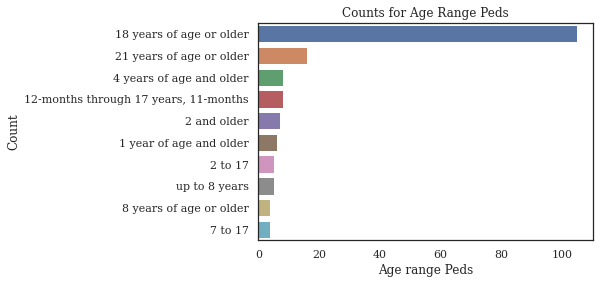

In [36]:
cat = ped_Device[ped_Device["Object"]=="age_range"]["Lexical cue"]
ax=sns.barplot(y=cat.value_counts().index[0:10], x=cat.value_counts().values[0:10])
ax.set(xlabel="Age range Peds", ylabel="Count", title="Counts for Age Range Peds")

In [209]:
#weeks should be converted or maybe omit age start
"""cat = inf_Device[inf_Device["Object"]=="age_start"]["Lexical cue"].astype(int)
ax=sns.barplot(x=cat.value_counts().index[0:10], y=cat.value_counts().values[0:10])
ax.set(xlabel="Age start Infants", ylabel="Count", title="Counts for Age Start Infants")"""

'cat = inf_Device[inf_Device["Object"]=="age_start"]["Lexical cue"].astype(int)\nax=sns.barplot(x=cat.value_counts().index[0:10], y=cat.value_counts().values[0:10])\nax.set(xlabel="Age start Infants", ylabel="Count", title="Counts for Age Start Infants")'

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Age range Infant'),
 Text(0.5, 1.0, 'Counts for Age Range Infants')]

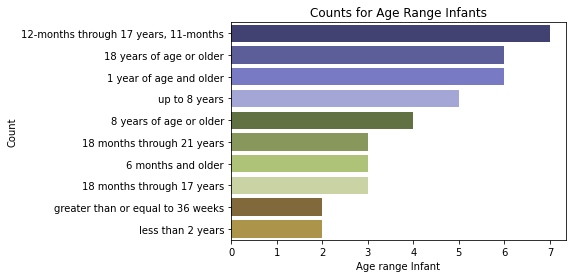

In [210]:
cat = inf_Device[inf_Device["Object"]=="age_range"]["Lexical cue"]
ax=sns.barplot(y=cat.value_counts().index[0:10], x=cat.value_counts().values[0:10])

ax.set(xlabel="Age range Infant", ylabel="Count", title="Counts for Age Range Infants")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Age range Children'),
 Text(0.5, 1.0, 'Counts for Age Range Children')]

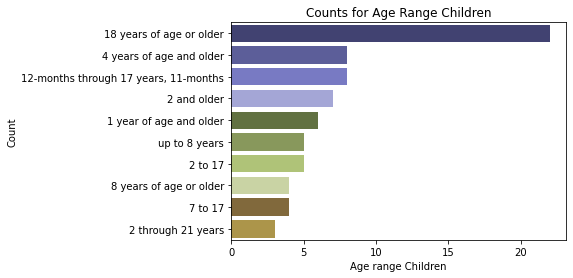

In [211]:
cat = child_Device[child_Device["Object"]=="age_range"]["Lexical cue"]
ax=sns.barplot(y=cat.value_counts().index[0:10], x=cat.value_counts().values[0:10])

ax.set(xlabel="Age range Children", ylabel="Count", title="Counts for Age Range Children")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Age range Adolescent'),
 Text(0.5, 1.0, 'Counts for Age Range Adolescent')]

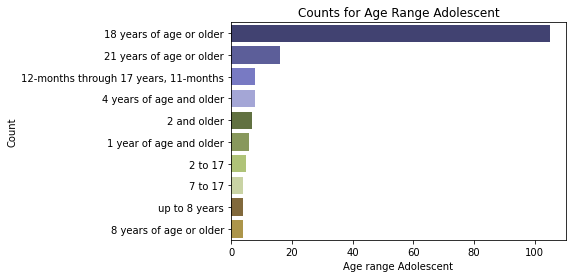

In [212]:
cat = adoles_Device[adoles_Device["Object"]=="age_range"]["Lexical cue"]
ax=sns.barplot(y=cat.value_counts().index[0:10], x=cat.value_counts().values[0:10])

ax.set(xlabel="Age range Adolescent", ylabel="Count", title="Counts for Age Range Adolescent")

PMA Analysis

In [35]:
pma=pd.read_csv("openFDAPMA.csv")
pma.shape

(304, 27)

In [36]:
unique_pma=pma.drop_duplicates(["pma_number"])

[Text(0, 0.5, 'Applicants'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

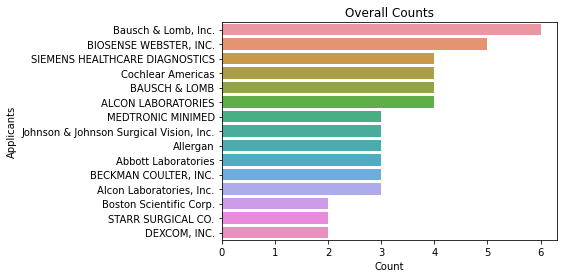

In [37]:
ax=sns.barplot(y=unique_pma["applicant"].value_counts().index[0:15], x=unique_pma["applicant"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Applicants", title="Overall Counts")

[Text(0, 0.5, 'Generic'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

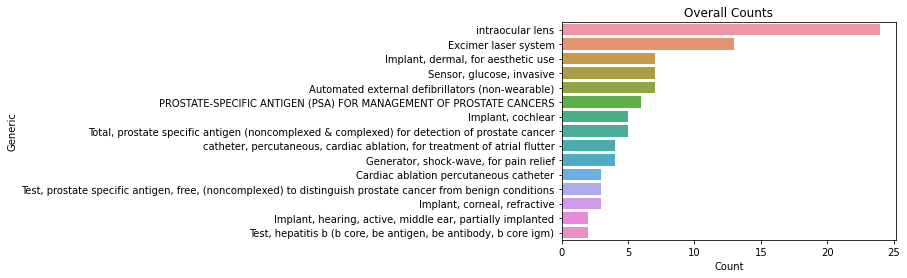

In [38]:
ax=sns.barplot(y=unique_pma["generic_name"].value_counts().index[0:15], x=unique_pma["generic_name"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Generic", title="Overall Counts")

[Text(0, 0.5, 'Trade Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

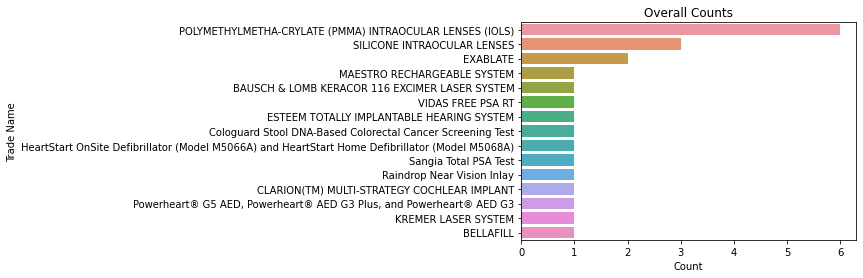

In [39]:
ax=sns.barplot(y=unique_pma["trade_name"].value_counts().index[0:15], x=unique_pma["trade_name"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Trade Name", title="Overall Counts")

[Text(0, 0.5, 'Device Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

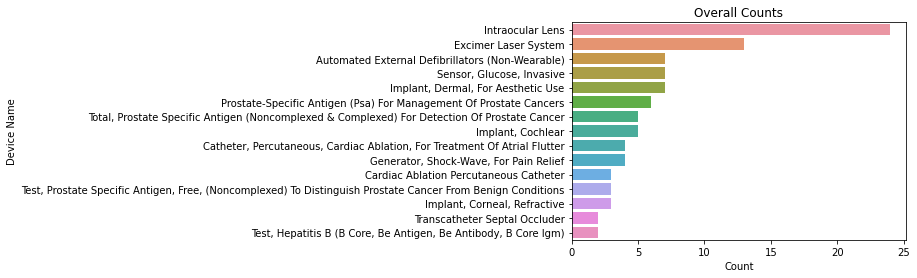

In [40]:
ax=sns.barplot(y=unique_pma["device_name"].value_counts().index[0:15], x=unique_pma["device_name"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Device Name", title="Overall Counts")

[Text(0, 0.5, 'Advisory Committee Description'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

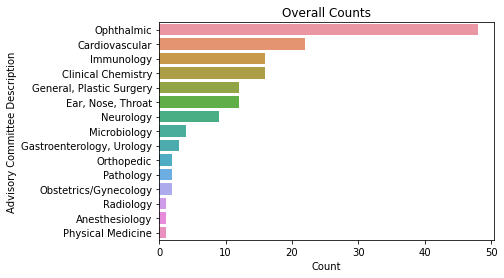

In [41]:
ax=sns.barplot(y=unique_pma["advisory_committee_description"].value_counts().index[0:15], x=unique_pma["advisory_committee_description"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Advisory Committee Description", title="Overall Counts")

[Text(0, 0.5, 'State'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

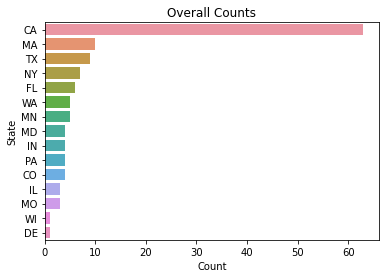

In [42]:
ax=sns.barplot(y=unique_pma["state"].value_counts().index[0:15], x=unique_pma["state"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="State", title="Overall Counts")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Overall Counts')]

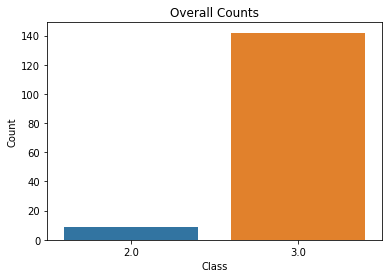

In [43]:
ax=sns.countplot(unique_pma["device_class"])
ax.set(xlabel="Class", ylabel="Count", title="Overall Counts")

In [26]:
unique_pma["device_class"].value_counts()

NameError: name 'unique_pma' is not defined

Subgroup Analysis w/ PMA Information Linked

[Text(0, 0.5, 'Advisory Committee Description'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

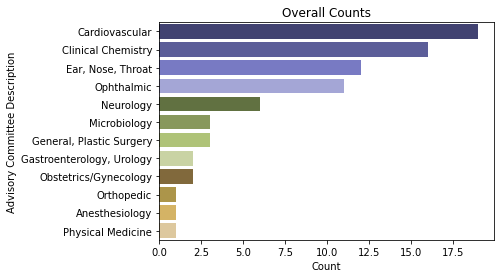

In [213]:
unique_ped_pma=unique_pma[unique_pma.pma_number.isin(pedDeviceID)]

ax=sns.barplot(y=unique_ped_pma["advisory_committee_description"].value_counts().index[0:15], x=unique_ped_pma["advisory_committee_description"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Advisory Committee Description", title="Overall Counts")

[Text(0, 0.5, 'Device Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

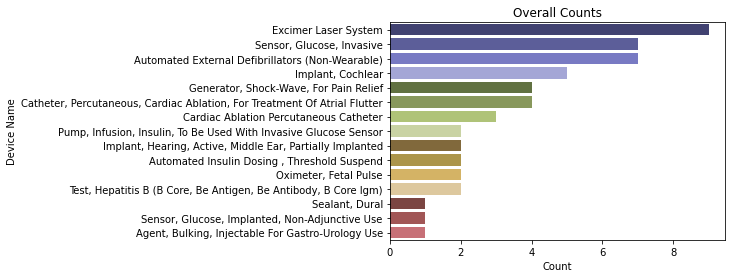

In [214]:
ax=sns.barplot(y=unique_ped_pma["device_name"].value_counts().index[0:15], x=unique_ped_pma["device_name"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Device Name", title="Overall Counts")

In [215]:
#ax=sns.countplot(unique_ped_pma["device_class"])
unique_ped_pma["device_class"].value_counts()

3.0    75
2.0     2
Name: device_class, dtype: int64

[Text(0, 0.5, 'Applicants'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

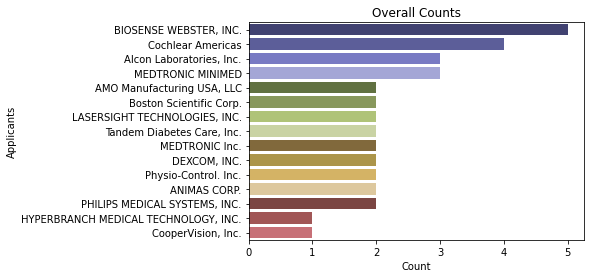

In [216]:
ax=sns.barplot(y=unique_ped_pma["applicant"].value_counts().index[0:15], x=unique_ped_pma["applicant"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Applicants", title="Overall Counts")

Infant Devices

[Text(0, 0.5, 'Advisory Committee Description'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

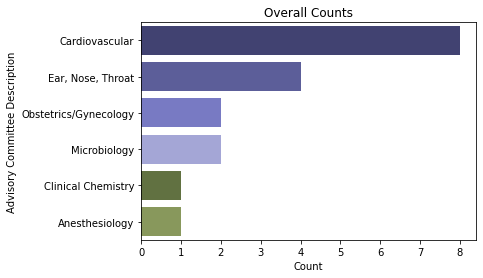

In [217]:
unique_inf_pma=unique_pma[unique_pma.pma_number.isin(infantDeviceID)]

ax=sns.barplot(y=unique_inf_pma["advisory_committee_description"].value_counts().index[0:15], x=unique_inf_pma["advisory_committee_description"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Advisory Committee Description", title="Overall Counts")

[Text(0, 0.5, 'Device Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

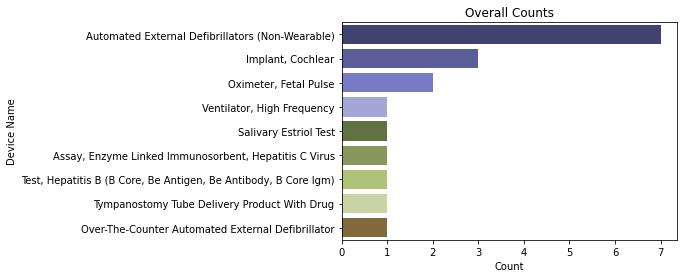

In [218]:
ax=sns.barplot(y=unique_inf_pma["device_name"].value_counts().index[0:15], x=unique_inf_pma["device_name"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Device Name", title="Overall Counts")

In [230]:
unique_inf_pma[unique_inf_pma["advisory_committee_description"]=="Ear, Nose, Throat"]["device_name"].value_counts()

Implant, Cochlear                               3
Tympanostomy Tube Delivery Product With Drug    1
Name: device_name, dtype: int64

In [219]:
unique_inf_pma["device_class"].value_counts()

3.0    18
Name: device_class, dtype: int64

Child Devices

[Text(0, 0.5, 'Advisory Committee Description'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

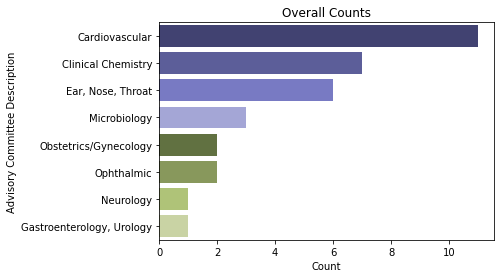

In [222]:
unique_child_pma=unique_pma[unique_pma.pma_number.isin(childrenDeviceID)]

ax=sns.barplot(y=unique_child_pma["advisory_committee_description"].value_counts().index[0:15], x=unique_child_pma["advisory_committee_description"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Advisory Committee Description", title="Overall Counts")

[Text(0, 0.5, 'Device Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

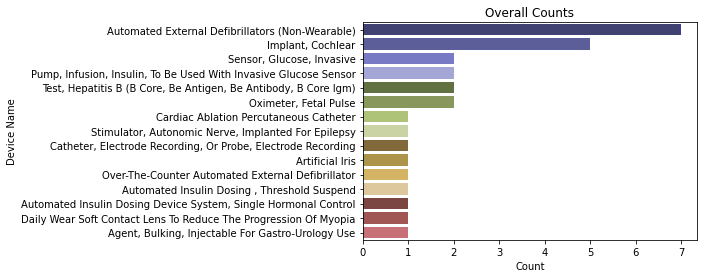

In [223]:
ax=sns.barplot(y=unique_child_pma["device_name"].value_counts().index[0:15], x=unique_child_pma["device_name"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Device Name", title="Overall Counts")

In [232]:
unique_child_pma[unique_child_pma["advisory_committee_description"]=="Clinical Chemistry"]["device_name"].value_counts()

Pump, Infusion, Insulin, To Be Used With Invasive Glucose Sensor    2
Sensor, Glucose, Invasive                                           2
Automated Insulin Dosing Device System, Single Hormonal Control     1
Glucose Oxidase, Glucose                                            1
Automated Insulin Dosing , Threshold Suspend                        1
Name: device_name, dtype: int64

In [231]:
unique_child_pma["device_class"].value_counts()

3.0    31
2.0     2
Name: device_class, dtype: int64

Adolescent Devices

[Text(0, 0.5, 'Advisory Committee Description'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

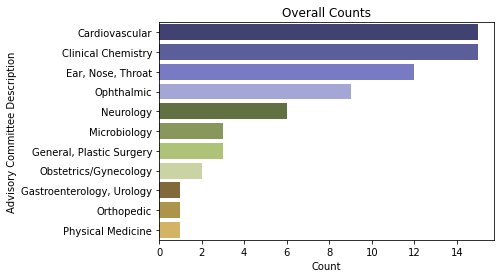

In [233]:
unique_adol_pma=unique_pma[unique_pma.pma_number.isin(adolescentDeviceID)]

ax=sns.barplot(y=unique_adol_pma["advisory_committee_description"].value_counts().index[0:15], x=unique_adol_pma["advisory_committee_description"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Advisory Committee Description", title="Overall Counts")

[Text(0, 0.5, 'Device Name'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

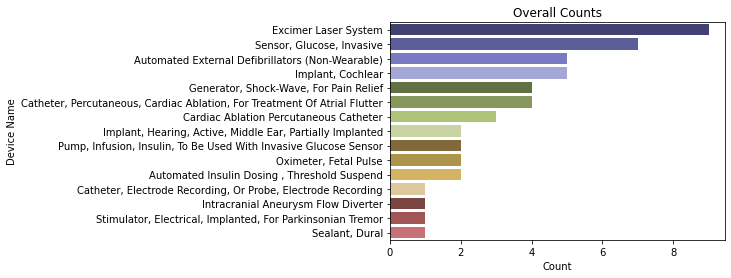

In [183]:
ax=sns.barplot(y=unique_adol_pma["device_name"].value_counts().index[0:15], x=unique_adol_pma["device_name"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Device Name", title="Overall Counts")

In [234]:
unique_adol_pma["device_class"].value_counts()

3.0    66
2.0     2
Name: device_class, dtype: int64

In [239]:
unique_adol_pma[unique_adol_pma["advisory_committee_description"]=="Cardiovascular"]["device_name"].value_counts()

Automated External Defibrillators (Non-Wearable)                                  5
Catheter, Percutaneous, Cardiac Ablation, For Treatment Of Atrial Flutter         4
Cardiac Ablation Percutaneous Catheter                                            3
Catheter, Electrode Recording, Or Probe, Electrode Recording                      1
Catheter, Percutaneous, Cardiac Ablation, For Treatment Of Atrial Fibrillation    1
Wearable Automated External Defibrillator                                         1
Name: device_name, dtype: int64

In [241]:
unique_adol_pma[unique_adol_pma["device_name"]=="Excimer Laser System"]["advisory_committee_description"]

7      Ophthalmic
19     Ophthalmic
45     Ophthalmic
52     Ophthalmic
85     Ophthalmic
157    Ophthalmic
206    Ophthalmic
214    Ophthalmic
296    Ophthalmic
Name: advisory_committee_description, dtype: object

[Text(0, 0.5, 'Advisory Committee Description'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'Overall Counts')]

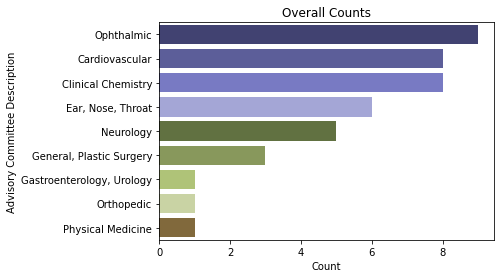

In [244]:
#look at uniquely adolescent

only_adol_pma=unique_pma[unique_pma.pma_number.isin(unique_adol)]

ax=sns.barplot(y=only_adol_pma["advisory_committee_description"].value_counts().index[0:15], x=only_adol_pma["advisory_committee_description"].value_counts().values[0:15])
ax.set(xlabel="Count", ylabel="Advisory Committee Description", title="Overall Counts")

Devices per Year

In [51]:
ageDevice = pd.read_csv("ageAnnot.csv")
print(str(ageDevice["DeviceID"].nunique()) + " unique devices")
uniqueDeviceID = ageDevice.DeviceID.unique()

151 unique devices


In [53]:
#ageDevice[ageDevice["Object"]=="age_range"]["Lexical cue"].unique()

In [54]:
def mapAgeRange(ageRange):
    if ageRange == "18 years of age or older":
        ageStart = "18"
        ageEnd = "older"
    elif ageRange == "21 years of age or older":
        ageStart, ageEnd = "21", "older"
    elif ageRange == '60 years of age or older':
        ageStart, ageEnd = "60", "older"
    elif ageRange == "18 and 60":
        ageStart, ageEnd = "18", "60"
    elif ageRange == "50  years or older":
        ageStart, ageEnd = "50", "older"
    elif ageRange == "1 year of age and older":
        ageStart, ageEnd ="1", "older"
    elif ageRange == "45 and 60 years":
        ageStart, ageEnd = "45", "60"
    elif ageRange == "21-45":
        ageStart, ageEnd ="21", "45"
    elif ageRange == "21-45 years":
        ageStart, ageEnd = "21", "45"
    elif ageRange == "22 years or older":
        ageStart, ageEnd = "21", "older"
    elif ageRange == "18 months through 21 years":
        ageStart, ageEnd="1", "21"
    elif ageRange == "less than 2 years":
        ageStart, ageEnd="0", "2"
    elif ageRange=="any age":
        ageStart, ageEnd="0", "older"
    elif ageRange == "4 years of age and older":
        ageStart, ageEnd = "4", "older"
    elif ageRange == "18-20":
        ageStart, ageEnd = "18", "20"
    elif ageRange == "65 to 74":
        ageStart, ageEnd = "65", "74"
    elif ageRange == "65 to 74 years":
        ageStart, ageEnd = "65", "74"
    elif ageRange == "7 and up":
        ageStart, ageEnd = "7", "older"
    elif ageRange == "12 years of age and greater":
        ageStart, ageEnd = "12", "older"
    elif ageRange=="6 months and older":
        ageStart, ageEnd="0", "older"
    elif ageRange == "40 years of age or older":
        ageStart, ageEnd = "40", "older"
    elif ageRange == "8 years of age or older":
        ageStart, ageEnd = "8", "older"
    elif ageRange == "up to 8 years":
        ageStart, ageEnd = "0", "8"
    elif ageRange == "12-months through 17 years, 11-months" :
        ageStart, ageEnd = "1", "18"
    elif ageRange == "2 and older":
        ageStart, ageEnd = "2", "older"
    elif ageRange == "30 years and older":
        ageStart, ageEnd = "30", "older"
    elif ageRange == "sixteen years of age and older":
        ageStart, ageEnd = "16", "older"
    elif ageRange=="8-12 years":
        ageStart, ageEnd="8", "12"
    elif ageRange == "2 to 17":
        ageStart, ageEnd = "2", "17"
    elif ageRange == "50-65 years":
        ageStart, ageEnd = "50", "65"
    elif ageRange == "2 through 21 years":
        ageStart, ageEnd = "2", "21"
    elif ageRange == "6 years of age and greater":
        ageStart, ageEnd = "6", "older"
    elif ageRange == "7 to 17":
        ageStart, ageEnd = "7", "17"
    elif ageRange == "18-months to 17-years":
        ageStart, ageEnd = "1", "17"
    elif ageRange == "24 to 41 weeks":
        ageStart, ageEnd = "0", "0"
    elif ageRange == "25 years and older":
        ageStart, ageEnd = "25", "older"
    elif ageRange == "at least 18 years":
        ageStart, ageEnd = "18", "older"
    elif ageRange == "18-months to 17-years":
        ageStart, ageEnd = "1", "17"
    elif ageRange == "24 to 38 weeks":
        ageStart, ageEnd = "0", "0"
    elif ageRange == "18 months  21 years":
        ageStart, ageEnd = "1", "21"
    elif ageRange == "greater than or equal to 75":
        ageStart, ageEnd = "75", "older"
    elif ageRange == "13 years of age and older":
        ageStart, ageEnd = "13", "older"
    elif ageRange == "3 to 17 years":
        ageStart, ageEnd = "3", "17"
    elif ageRange == "over 60 years":
        ageStart, ageEnd = "60", "older"
    elif ageRange == "6-11":
        ageStart, ageEnd = "6", "11"
    elif ageRange == "6-11 years":
        ageStart, ageEnd = "6", "11"
    elif ageRange == "greater than or equal to 36 weeks":
        ageStart, ageEnd = "0", "older"
    elif ageRange == "<= 75 years":
        ageStart, ageEnd = "0", "75"
    elif ageRange == "14 to 75 years":
        ageStart, ageEnd = "14", "75"
    elif ageRange == "14 years and older":
        ageStart, ageEnd = "14", "older"
    elif ageRange == "22 to 36 weeks":
        ageStart, ageEnd = "0", "0"
    elif ageRange == "18 months through 17 years":
        ageStart, ageEnd = "1", "17"
    elif ageRange == "1 and 8 years":
        ageStart, ageEnd = "1", "8"
    elif ageRange == "under 18 years of age":
        ageStart, ageEnd = "0", "18"
    elif ageRange == "50 years or older":
        ageStart, ageEnd = "50", "older"
    elif ageRange == "41 to 65 years":
        ageStart, ageEnd = "41", "65"
    elif ageRange == "45 years or older":
        ageStart, ageEnd = "45", "older"
    elif ageRange == "15 years or older":
        ageStart, ageEnd = "15", "older"
    elif ageRange == "greater than or equal to 65 years":
        ageStart, ageEnd = "65", "older"
    elif ageRange == "greater than or equal to 75 years":
        ageStart, ageEnd = "75", "older"
    else:
        print("whups not found")
    return ageStart, ageEnd

In [55]:

device=ageDevice[ageDevice.DeviceID == "P160029"]
device[device["Object"]=="age_category"]["Lexical cue"].unique()

array(['adults', 'infants', 'children'], dtype=object)

In [56]:
def mapAgeCat(cat):
    if cat == "adults":
        starter = "21"
        ender = "older"
    elif cat == "pediatric":
        starter = "0"
        ender = "21"
    elif cat =="children":
        starter = "2"
        ender = "12"
    elif cat == "adolescents":
        starter = "12"
        ender = "21"
    elif cat == "neonates":
        starter = "0"
        ender="0"
    elif cat =="infants":
        starter = "0"
        ender = "2"
        
    return starter, ender

In [57]:
for deviceID in uniqueDeviceID:
    finalStarter = 1000
    finalEnder = -1
    device = ageDevice[ageDevice.DeviceID==deviceID]
    #handle devices with mutliple age ranges
    #take union of age ranges
    if len(device[device["Object"]=="age_range"])>0:
        rangers = device[device["Object"]=="age_range"]["Lexical cue"].unique()
        if len(rangers)>1:
            for ranger in rangers:
                starter, ender = mapAgeRange(ranger)
                #print(starter, ender)
                if int(starter) < finalStarter:
                    finalStarter = int(starter)
                if ender =='older':
                    finalEnder=ender
                if finalEnder != "older":
                    if int(ender) > finalEnder:
                        finalEnder=int(ender)
                        
    cats = ageDevice[(ageDevice.DeviceID==deviceID) & (ageDevice.Object=="age_category")]["Lexical cue"].unique()
    finalCatStarter=1000
    finalCatEnder=-1
    if len(cats)>1:
        for cat in cats:
            start, end = mapAgeCat(cat)
            #print(start, end)
            if int(start) < finalCatStarter:
                finalCatStarter = int(start)
            if end =='older':
                finalCatEnder=end
            if finalCatEnder != "older":
                if int(end) > finalCatEnder:
                    finalCatEnder=int(end)
        print(finalCatStarter, finalCatEnder)

0 older
2 older
2 older
0 older
0 older
0 older
0 older
2 older
12 older
0 21
2 older
2 older
0 older
0 12
2 older
0 older
2 older
2 older
0 12


In [58]:
#151
ID=[]
start=[]
end=[]

for deviceID in uniqueDeviceID:
    finalStarter = 1000
    finalEnder = -1
    device = ageDevice[ageDevice.DeviceID==deviceID]
    if len(device[device["Object"]=="age_range"])>0:
        rangers = device[device["Object"]=="age_range"]["Lexical cue"].unique()
        #handle devices with mutliple age ranges
        #take union of age ranges
        if len(rangers)>1:
            for ranger in rangers:
                starter, ender = mapAgeRange(ranger)
                if int(starter) < finalStarter:
                    finalStarter = int(starter)
                if ender =='older':
                    finalEnder=ender
                if finalEnder != "older":
                    if int(ender) > finalEnder:
                        finalEnder=int(ender)
            start.append(finalStarter)
            end.append(finalEnder)
            ID.append(deviceID)
        else:
            #device with one age range
            starter, ender = mapAgeRange(rangers[0])
            start.append(starter)
            end.append(ender)
            ID.append(deviceID)
                
    else:
        #handle categories
        cats = ageDevice[(ageDevice.DeviceID==deviceID) & (ageDevice.Object=="age_category")]["Lexical cue"].unique()
        finalCatStarter=1000
        finalCatEnder=-1
        #handle devices with multiple age ranges
        if len(cats)>1:
            for cat in cats:
                catStart, catEnd = mapAgeCat(cat)
                #print(start, end)
                if int(catStart) < finalCatStarter:
                    finalCatStarter = int(catStart)
                if catEnd =='older':
                    finalCatEnder=catEnd
                if finalCatEnder != "older":
                    if int(catEnd) > finalCatEnder:
                        finalCatEnder=int(catEnd)
            start.append(finalCatStarter)
            end.append(finalCatEnder)
            ID.append(deviceID)
        else:
            #device with single category
            for cat in cats:
                catStart, catEnd=mapAgeCat(cat)
                start.append(catStart)
                end.append(catEnd)
                ID.append(deviceID)
        

In [59]:
ageRange_df = pd.DataFrame(
    {'ID': ID,
     'Start': start,
     'End': end
    })

#ageRange_df = pd.merge(ageRange_df, unique_pma[["pma_number", "advisory_committee_description"]], left_on = "ID" , right_on = "pma_number")

In [60]:
ageRange_df = pd.merge(ageRange_df, unique_pma[["pma_number", "advisory_committee_description"]], left_on = "ID" , right_on = "pma_number")

In [72]:
ageRange_df.shape

(151, 5)

In [337]:
counts = [0]*23
agesX=["0", "1", "2", "3", "4", "5", "6", "7", "8","9","10","11",
      "12", "13","14", "15", "16", "17", "18", "19", "20", "21", "21+"]
for i in range(0, len(ageRange_df)):
    
    ageStart = ageRange_df.iloc[i].Start
    ageEnd = ageRange_df.iloc[i].End
    
    if ageEnd == "older" or ageEnd=="adulthood" or ageEnd=="over":
        ageEnd = len(agesX) -1 
    #print(ageEnd)
    ageStart = int(ageStart)
    ageEnd = int(ageEnd)
    if ageEnd >21:
        ageEnd = len(agesX) -1 
        
    if ageStart>21:
        ageStart = len(agesX) -1 
    
    if ageStart==len(agesX) and ageEnd==len(agesX):
        counts[-1]=counts[-1]+1
        
    for j in range(ageStart, ageEnd +1):
        counts[j]= counts[j]+1
        

In [330]:
ageRange_df["End"].value_counts()

older    133
12         3
60         3
21         2
75         2
65         2
12         1
45         1
21         1
8          1
0          1
0          1
Name: End, dtype: int64

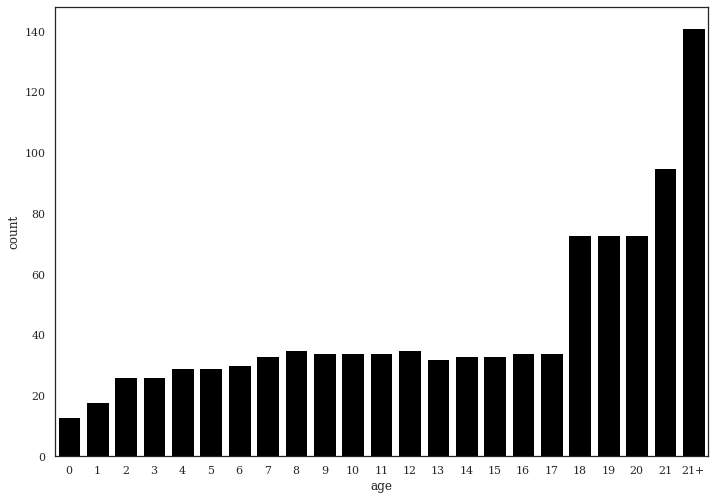

In [338]:
ageCounts=pd.DataFrame({"age": agesX, "count": counts})
#change to black
sns.set(rc={'figure.figsize':(11.7,8.27)})
set_style()
ax = sns.barplot(x=ageCounts["age"], y=ageCounts["count"], color = "black")
plt.savefig('Figures/Devices_Available_over_Age.png', dpi=300)

In [263]:
92/73

1.2602739726027397

In [106]:
ageCounts.iloc[0:22]["count"].mean()

38.45454545454545

In [109]:
ageCounts.iloc[0:18]["count"].mean()

29.72222222222222

In [321]:
ageRange_df["advisory_committee_description"].value_counts()

Ophthalmic                   48
Cardiovascular               22
Immunology                   16
Clinical Chemistry           16
General, Plastic Surgery     12
Ear, Nose, Throat            12
Neurology                     9
Microbiology                  4
Gastroenterology, Urology     3
Orthopedic                    2
Pathology                     2
Obstetrics/Gynecology         2
Radiology                     1
Anesthesiology                1
Physical Medicine             1
Name: advisory_committee_description, dtype: int64

In [340]:
optho_counts = [0]*23
cardio_counts = [0]*23
immuno_counts = [0]*23
ortho_counts = [0]*23
ent_counts = [0]*23
chem_counts = [0]*23
micro_counts= [0]*23
surgery_counts= [0]*23
neuro_counts= [0]*23
radio_counts= [0]*23
anesth_counts= [0]*23
gastro_uro_counts= [0]*23
obgyn_counts= [0]*23
path_counts= [0]*23
phys_med_counts= [0]*23

specialtyCounts = [optho_counts, cardio_counts, immuno_counts, ortho_counts, ent_counts,
                  chem_counts, micro_counts, surgery_counts, neuro_counts, radio_counts,
                  anesth_counts, gastro_uro_counts, obgyn_counts, path_counts, phys_med_counts]

specialties=['Ophthalmic', 'Cardiovascular', 'Immunology', 'Orthopedic',
       'Ear, Nose, Throat', 'Clinical Chemistry', 'Microbiology',
       'General, Plastic Surgery', 'Neurology', 'Radiology',
       'Anesthesiology', 'Gastroenterology, Urology',
       'Obstetrics/Gynecology', 'Pathology', 'Physical Medicine']


agesX=["0", "1", "2", "3", "4", "5", "6", "7", "8","9","10","11",
      "12", "13","14", "15", "16", "17", "18", "19", "20", "21", "21+"]
for i in range(0, len(ageRange_df)):
    
    ageStart = ageRange_df.iloc[i].Start
    ageEnd = ageRange_df.iloc[i].End
    specialty = ageRange_df.iloc[i].advisory_committee_description
    
    if ageEnd == "older" or ageEnd=="adulthood":
        ageEnd = len(agesX) -1
    #print(ageEnd)
    ageStart = int(ageStart)
    ageEnd = int(ageEnd)
    if ageEnd >21:
        ageEnd = len(agesX) -1
    if ageStart>21:
        ageStart = len(agesX) -1 
    
    if ageStart==len(agesX) and ageEnd==len(agesX):
        index=specialties.index(specialty)
        specialtyCounts[index][-1]=specialtyCounts[index][-1] + 1
        
    for j in range(ageStart, ageEnd+1):
        #print(specialty)
        index=specialties.index(specialty)
        specialtyCounts[index][j]=specialtyCounts[index][j] + 1
        

In [341]:
specialCount = pd.DataFrame({"optho": optho_counts, "cardio": cardio_counts,
              "immuno": immuno_counts, "ortho": ortho_counts,
             "ent": ent_counts, "chem": chem_counts, "micro": micro_counts,
             "surgery": surgery_counts, "neuro":neuro_counts,
              "radio":radio_counts, "anesth":anesth_counts, "gi/gu":gastro_uro_counts,
            "obgyn":obgyn_counts, "path":path_counts,
              "phys_med":phys_med_counts})

<BarContainer object of 23 artists>

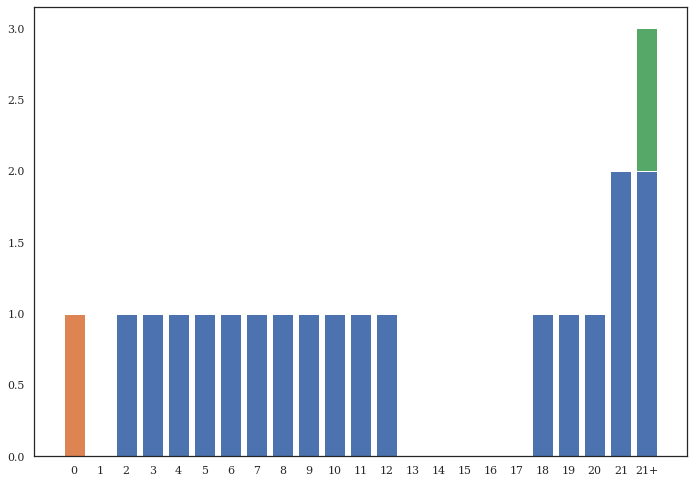

In [354]:
plt.bar(agesX, specialCount["gi/gu"])
plt.bar(agesX, specialCount["anesth"], bottom = specialCount["gi/gu"])
plt.bar(agesX, specialCount["radio"], bottom = specialCount["gi/gu"])


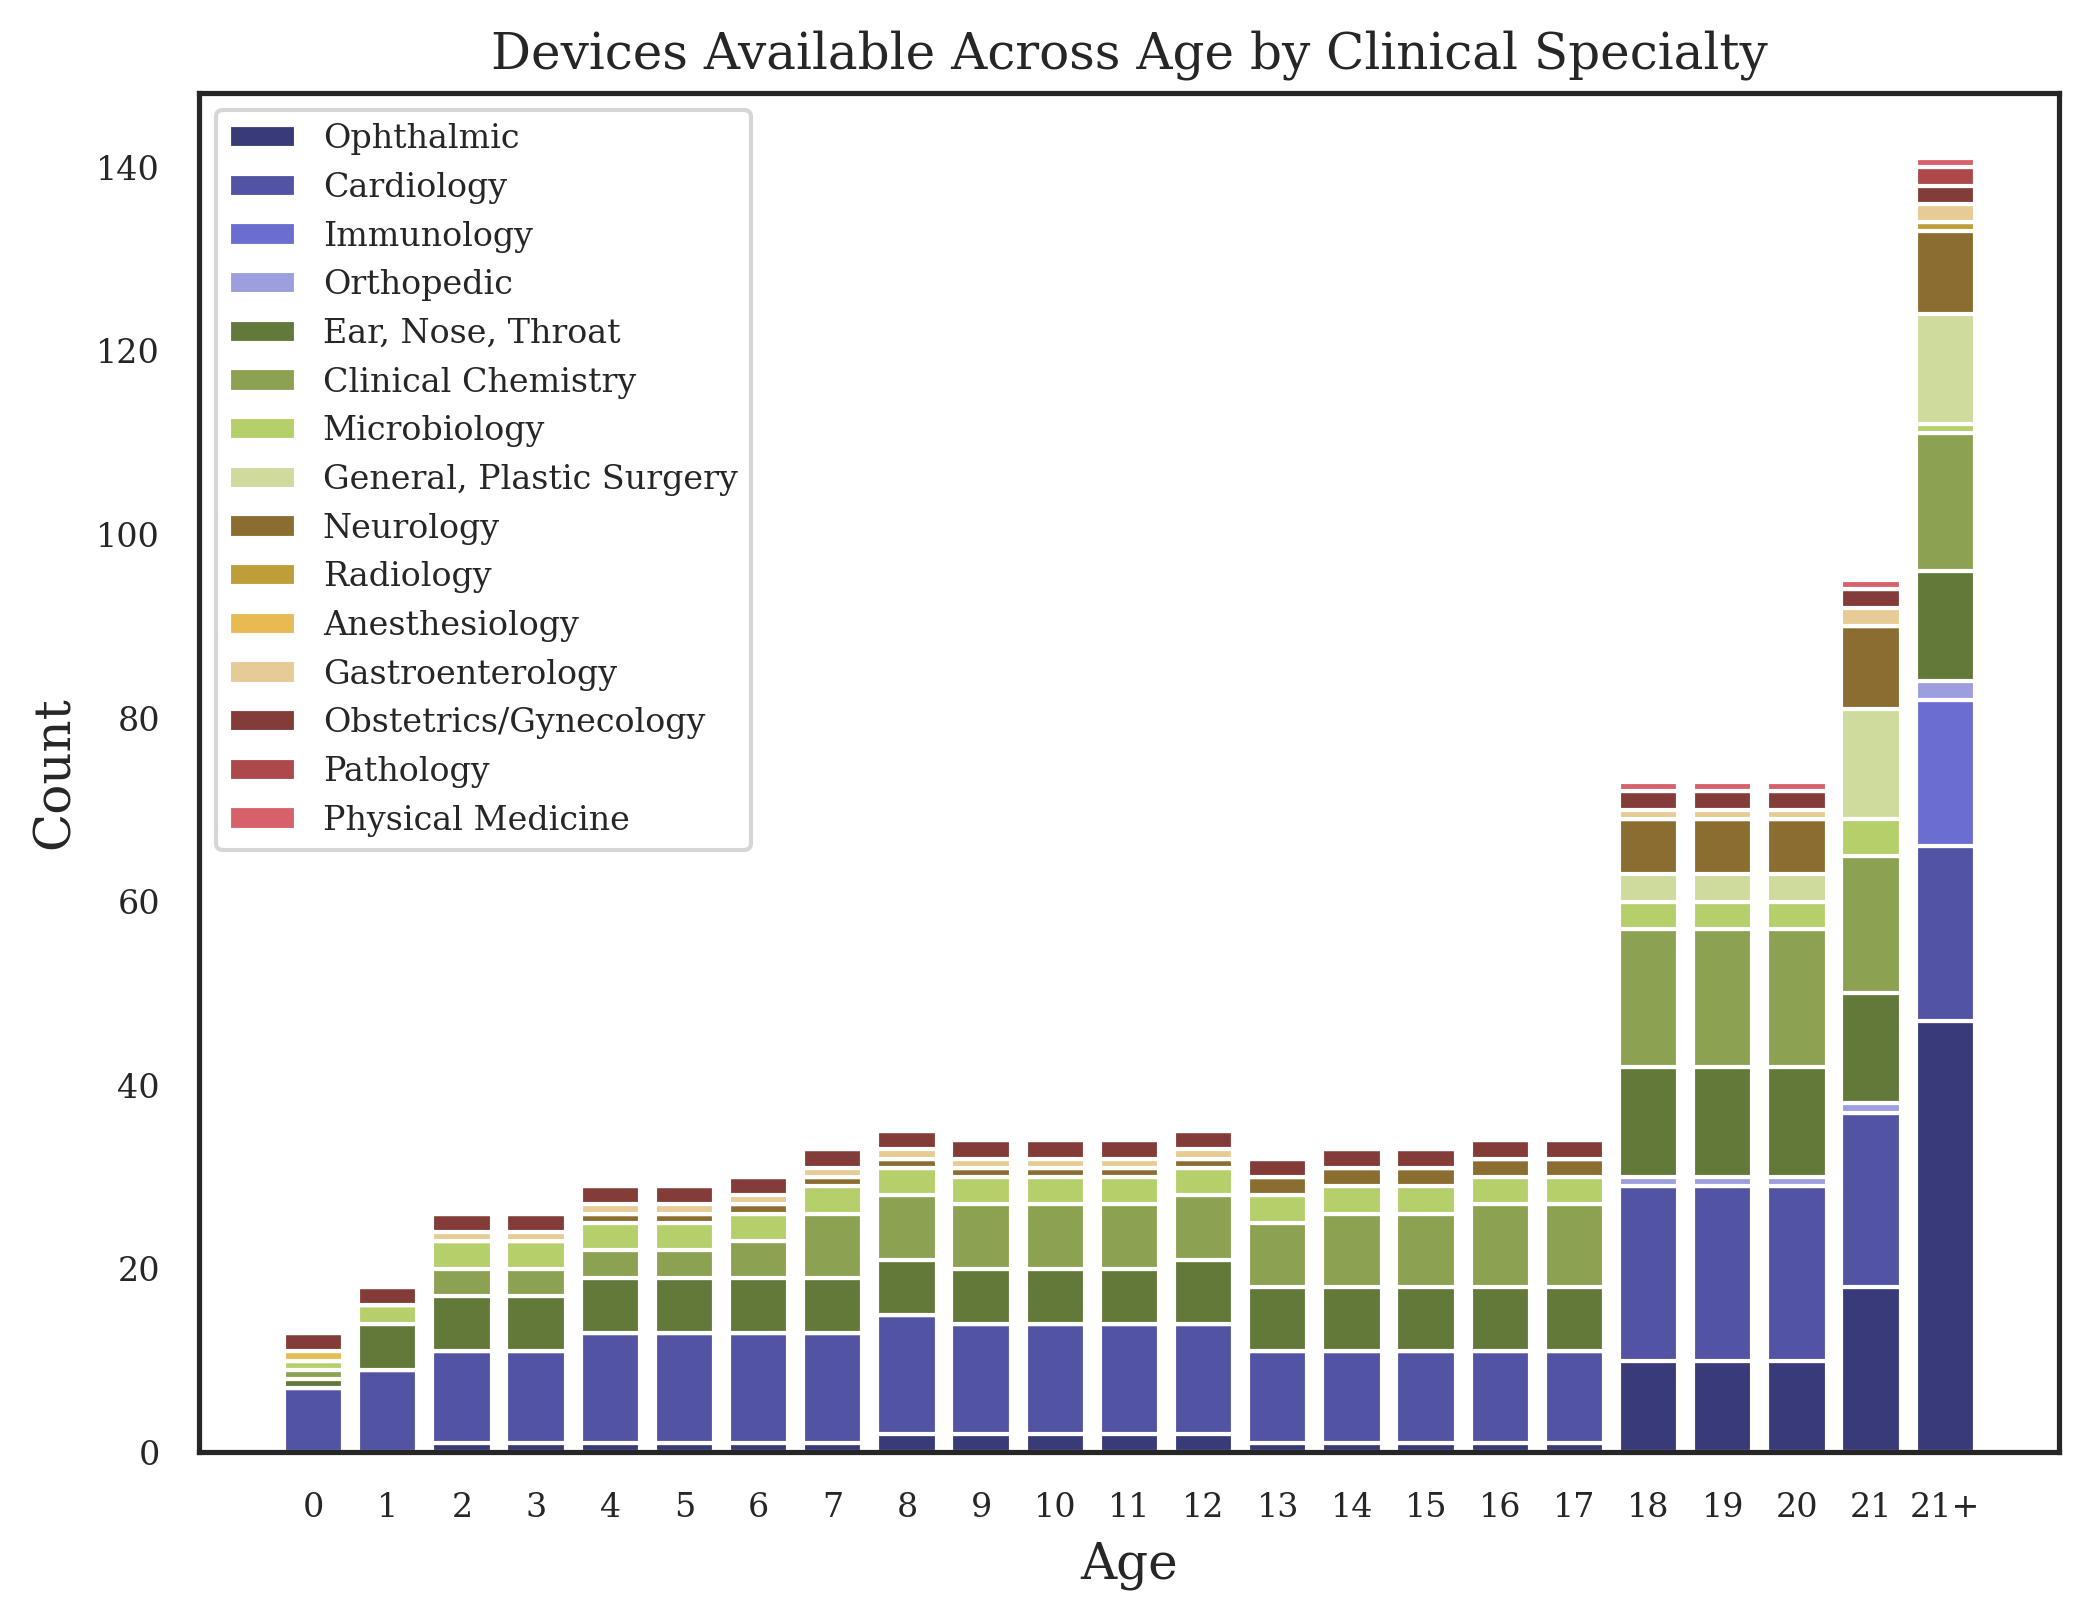

In [357]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=300, facecolor='w', edgecolor='k')
#sns.set(rc={'figure.figsize':(4, 2)})
sns.set_palette("tab20b")

p1 = plt.bar(agesX, specialCount["optho"])
p2 = plt.bar(agesX, specialCount["cardio"], bottom = specialCount["optho"])
bars = np.add(specialCount["optho"], specialCount["cardio"]).tolist()
p3 = plt.bar(agesX, specialCount["immuno"], bottom = bars)
bars = np.add(bars, specialCount["immuno"]).tolist()
p4 = plt.bar(agesX, specialCount["ortho"], bottom = bars)
bars = np.add(bars, specialCount["ortho"]).tolist()
p5 = plt.bar(agesX, specialCount["ent"], bottom = bars)
bars = np.add(bars, specialCount["ent"]).tolist()
p6 = plt.bar(agesX, specialCount["chem"], bottom = bars)
bars = np.add(bars, specialCount["chem"]).tolist()
p7 = plt.bar(agesX, specialCount["micro"], bottom = bars)
bars = np.add(bars, specialCount["micro"]).tolist()
p8 = plt.bar(agesX, specialCount["surgery"], bottom = bars)
bars = np.add(bars, specialCount["surgery"]).tolist()
p9 = plt.bar(agesX, specialCount["neuro"], bottom = bars)
bars = np.add(bars, specialCount["neuro"]).tolist()
p10 = plt.bar(agesX, specialCount["radio"], bottom = bars)
bars = np.add(bars, specialCount["radio"]).tolist()
p11 = plt.bar(agesX, specialCount["anesth"], bottom = bars)
bars = np.add(bars, specialCount["anesth"]).tolist()
p12 = plt.bar(agesX, specialCount["gi/gu"], bottom = bars)
bars = np.add(bars, specialCount["gi/gu"]).tolist()
p13= plt.bar(agesX, specialCount["obgyn"], bottom = bars)
bars = np.add(bars, specialCount["obgyn"]).tolist()
p14 = plt.bar(agesX, specialCount["path"], bottom = bars)
bars = np.add(bars, specialCount["path"]).tolist()
p15= plt.bar(agesX, specialCount["phys_med"], bottom = bars)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Devices Available Across Age by Clinical Specialty")

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0],
            p6[0], p7[0], p8[0], p9[0], p10[0],p11[0],
            p12[0], p13[0], p14[0], p15[0]),
           ('Ophthalmic', 'Cardiology', 'Immunology', "Orthopedic",
            "Ear, Nose, Throat", "Clinical Chemistry", "Microbiology", "General, Plastic Surgery",
           "Neurology", "Radiology", "Anesthesiology", "Gastroenterology",
           "Obstetrics/Gynecology", "Pathology", "Physical Medicine"), fontsize=8)
plt.tick_params(labelsize=8)
set_style()


In [266]:
specialCount.sum(axis=0).sort_values(ascending=False)

cardio      287
chem        174
ent         168
optho       115
micro        62
neuro        55
obgyn        46
surgery      33
gi/gu        17
immuno       16
ortho         6
phys_med      5
path          2
radio         1
anesth        0
dtype: int64

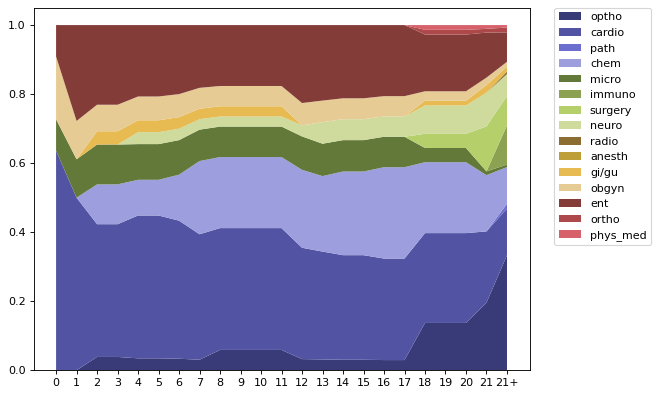

In [269]:
totals=specialCount.sum(axis=1)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set_palette("tab20b")

percentileSpecialCount=specialCount.div(totals, axis='rows')
label = ['optho', 'cardio', 'path', 'chem', 'micro', 'immuno', 'surgery', 'neuro',
        'radio', 'anesth', 'gi/gu', 'obgyn', "ent", "ortho", 'phys_med']

#col = sns.color_palette("husl", 15)

plt.stackplot(agesX,percentileSpecialCount["optho"], percentileSpecialCount["cardio"],
               percentileSpecialCount["path"], percentileSpecialCount["chem"], 
              percentileSpecialCount["micro"], percentileSpecialCount["immuno"], percentileSpecialCount["surgery"],
             percentileSpecialCount["neuro"], percentileSpecialCount["radio"], percentileSpecialCount["anesth"],
             percentileSpecialCount["gi/gu"], percentileSpecialCount["obgyn"], percentileSpecialCount["ent"], 
              percentileSpecialCount["ortho"], percentileSpecialCount["phys_med"], labels = label)

#plt.legend(loc='best')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
